In [1]:
import pandas as pd
import numpy as np

In [4]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
           "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
           "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
           "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]


In [31]:
df = pd.read_csv("./Dataset/kddcup.data_10_percent_corrected",names= columns)

In [32]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
420473,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00,smurf.
297420,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00,smurf.
279280,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00,smurf.
109630,0,tcp,private,S0,0,0,0,0,0,0,...,10,0.04,0.07,0.0,0.0,1.00,1.00,0.00,0.00,neptune.
51538,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.0,0.0,0.01,0.01,0.04,0.04,back.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
corr = df.corr(numeric_only = True)

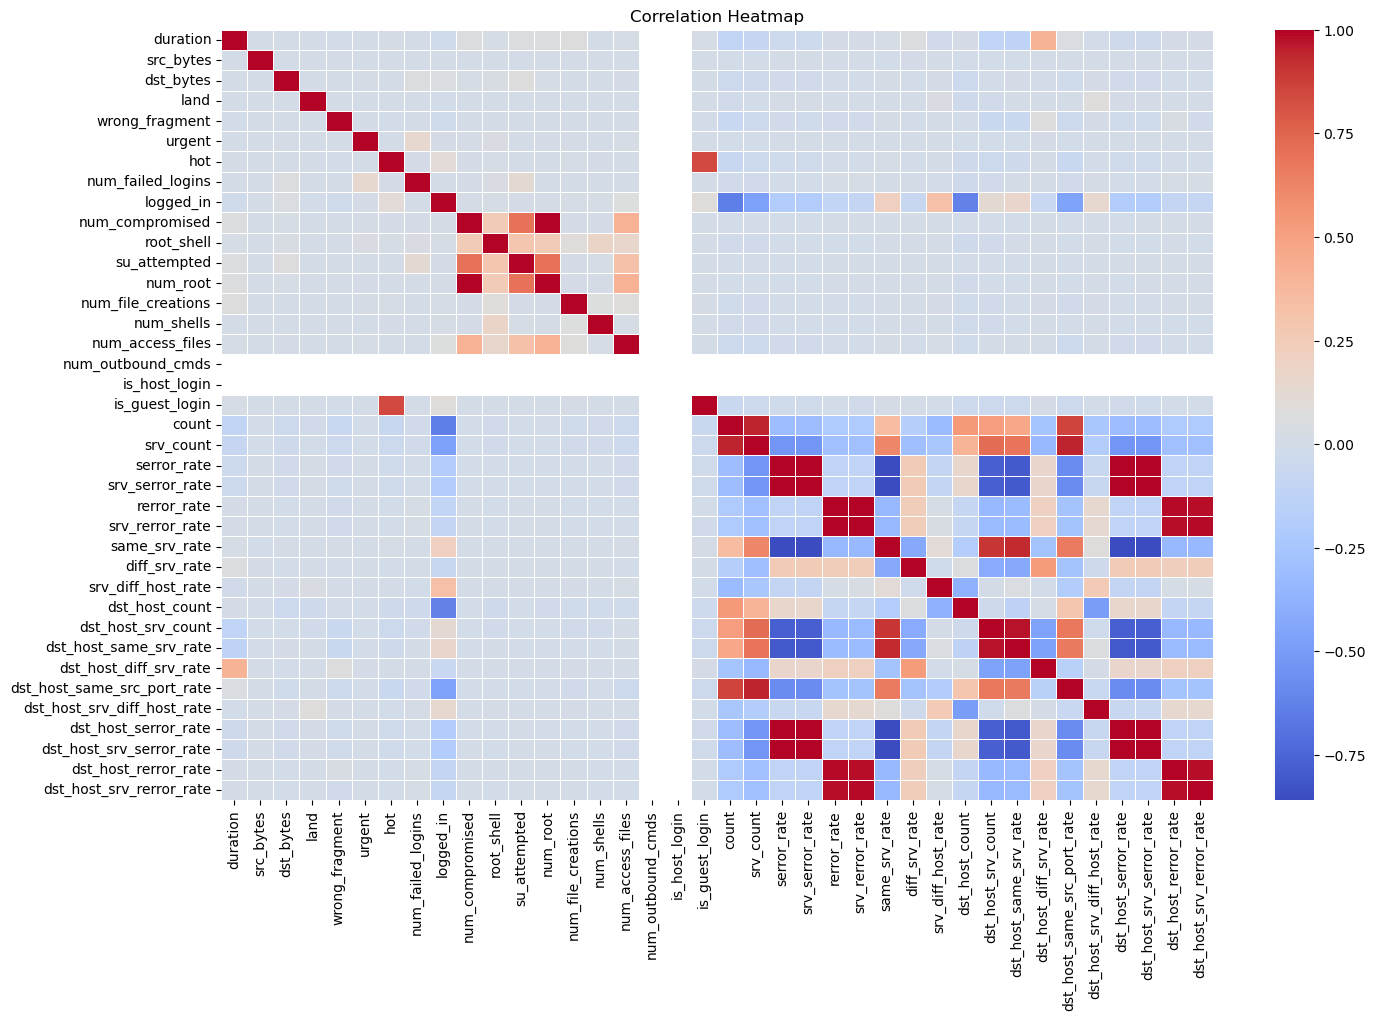

In [34]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [35]:
categorical_cols = ['protocol_type','service','flag']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [40]:
df.sample(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
448239,0,0,14,9,520,0,0,0,0,0,...,255,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,attack
195071,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,attack
346138,0,1,22,1,0,0,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.0,1.0,1.0,normal
329185,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,attack
254369,0,0,14,9,1032,0,0,0,0,0,...,255,1.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,attack


In [37]:
df['label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [38]:
df['label'] = df['label'].apply( lambda x : "normal" if x =="normal."else "attack")

In [39]:
df['label'].unique().sum()

'normalattack'

In [41]:
X = df.drop("label",axis =1)
y = df["label"]

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()


In [46]:
X_scaled = scaler.fit_transform(X)

In [47]:
X_scaled

array([[-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.46320239,
        -0.25203952, -0.249464  ],
       ...,
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.4369501 ,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.4369501 ,
        -0.25203952, -0.249464  ],
       [-0.06779172,  0.92575306, -0.1040671 , ..., -0.4369501 ,
        -0.25203952, -0.249464  ]])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [52]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy = accuracy_score(y_test,y_pred)

In [56]:
accuracy

0.999757097312889

In [57]:
import joblib
joblib.dump(model,"IDS.pkl")

['IDS.pkl']

In [ ]:
joblib.dump(scaler,"scale